**Plot some gradient descent steps map** for the two quadratic objective functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

The following plotting function will be useful.

In [2]:
def draw_map(f):
  nplt=401
  xplot=np.linspace(-2,2.5,nplt)
  yplot=np.linspace(-1,3,nplt)
  X,Y=np.meshgrid(xplot,yplot) # creates the necessary grid
  Z=np.zeros((nplt,nplt))
  for k in range(0,nplt):
    for s in range (0,nplt):
      Z[k,s]=f([X[k,s],Y[k,s]]) # non vectorized function evaluation
  plt.contourf(X,Y,Z,levels=40,cmap=cm.jet_r) # note you can specify the colormap (here reversed)
  plt.plot([0],[0],'g*')
  plt.colorbar()
  plt.axis('equal') # correct aspect ratio

Define the backtracking function

In [5]:
def backtrack(F,Fprime,alphabar):
  # backtracking starting at alpha=alphabar
  #
  c1=1.e-04
  rho=.5
  # Fill in the correct code here
  for j in range(0,20):
    if F(alphabar) < F(0) + c1 * alphabar * Fprime: break
    alphabar = alphabar * rho
  return alphabar

Define gradient descent function

In [19]:
def graddescent(xstart,f,gradf,tol,maxit):
  # basic gradient descent algorithm
  # Input:  xstart=initial guess vector
  #         f = function returning f(x)
  #         gradf = function implementing the gradient of x
  #         tol = stopping tolerance
  #         maxit=maximum number of iterations
  # Return:
  #         x = best estimate of the minimum
  #         m = number of steps taken
  # Fill in the body of the function here
  x = xstart
  for kstep in range(0,maxit):
    pk = -gradf(x)
    alpha = 1
    F = lambda alpha: f(x+alpha*pk)
    Fprimezero = np.dot(pk,gradf(x))
    alpha = backtrack(F,Fprimezero,alpha)
    plt.plot([x[0],x[0]+alpha*pk[0]],[x[1],x[1]+alpha*pk[1]],'bo-')
    x = x + alpha * pk
    if np.linalg.norm(gradf(x))/(1+f(x)) < tol: break
  return x,kstep



Now apply the above functions to solve the requested problem

the predicted minimizer is  [0.99992288 0.99984529]  after  9161  iterations


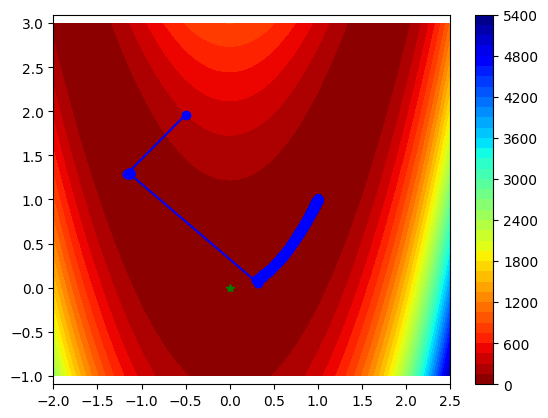

In [20]:
f=lambda x: (x[0]-1)**2+100*(x[1]-x[0]**2)**2
gradf=lambda x:np.array([2*(x[0]-1)-400*x[0]*(x[1]-x[0]**2),200*(x[1]-x[0]**2)])
xstart=np.array([-.5,1.9619])
maxit=10000
tol=1.e-4
plt.figure()
draw_map(f)
x,m=graddescent(xstart,f,gradf,tol,maxit)
print('the predicted minimizer is ',x,' after ',m,' iterations')
plt.show()

